# Chroma and Tempogram Visualization
Computing Chroma and Tempogram, reducing each to a single dimension using t-SNE, and plotting each at one axis while controlling their spread. Script for StartAD demo visualization, traversing similarity at two different, independent axes.

### Importing

In [2]:
%matplotlib inline
import glob
import numpy as np
import librosa
import os
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import vega
import altair as alt
import pandas as pd
import scipy.signal
import scipy.fftpack as fft
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Read audio paths

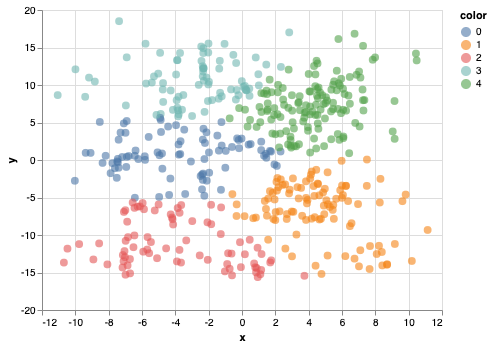

In [4]:
#File reading
all_dirs = []
for root, dirs, files in os.walk('./Test2'): #change directory here
        for name in files:
            if '.wav' in name:
                filedir = os.path.join(root, name)
                all_dirs.append(filedir)

### Feature computation

In [ ]:
#Feature Computation
all_chroma = []
all_tempo = []
file_names = []
file_no = len(all_dirs)
print(file_no)
for i in range(file_no):
    if (librosa.get_duration(filename=all_dirs[i]) > 13.):
        file_names.append(all_dirs[i])
        
        #Load file
        y, sr = librosa.core.load(all_dirs[i], duration=13.)
        #Features
        chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
        all_chroma.append(chroma.flatten())
        tempo = librosa.feature.tempogram(y=y, sr=sr)
        all_tempo.append(tempo.flatten())

    sys.stdout.write("\rLoading %i recordings." % (i))
    sys.stdout.flush()

### Visualization

In [ ]:
#Standardization
scl1 = StandardScaler()
all_chroma_scaled = scl1.fit_transform(all_chroma)
scl2 = StandardScaler()
all_tempo_scaled = scl2.fit_transform(all_tempo)

#TSNE
all_chroma_scaled_red1 = TSNE(n_components=1).fit_transform(all_chroma_scaled)
all_tempo_scaled_red1 = TSNE(n_components=1).fit_transform(all_tempo_scaled)

combined = np.hstack((all_chroma_scaled_red1, all_tempo_scaled_red1))

#KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(combined) #change number of clusters here
clusters = kmeans.predict(combined)

#Visualization
df = pd.DataFrame({'x': all_chroma_scaled_red1.flatten(), 'y': all_tempo_scaled_red1.flatten(), 'color': clusters, 'path': np.asarray(file_names), 'filename': np.asarray(file_names)})
alt.Chart(df).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='color:N', href='path', tooltip=['filename']).interactive()